In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset from the CSV file
df = pd.read_csv('USA_Housing_toy.csv')

# X contains all the columns we will use as features to predict the price
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]

# y is the target variable, the 'Price' column, which we want to predict
y = df['Price']

# You can print the first few rows of X to see what it looks like
print("Features (X):")
print(X.head())

Features (X):
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             79545                    6                          7   
1             79249                    6                          7   
2             61287                    6                          9   
3             63345                    7                          6   
4             59982                    5                          8   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09            23087  
1                          3.09            40173  
2                          5.13            36882  
3                          3.26            34310  
4                          4.23            26354  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
# Create an instance of a Linear Regression model
lm = LinearRegression()

# Train the model using our training data (X_train and y_train)
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
# Use the trained model to make predictions on the test data
predictions = lm.predict(X_test)

# Print model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)**0.5)
print('R-squared Score:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 97884.6689273226
Mean Squared Error: 14862080497.870272
Root Mean Squared Error: 121910.13287610785
R-squared Score: 0.8806545220440855


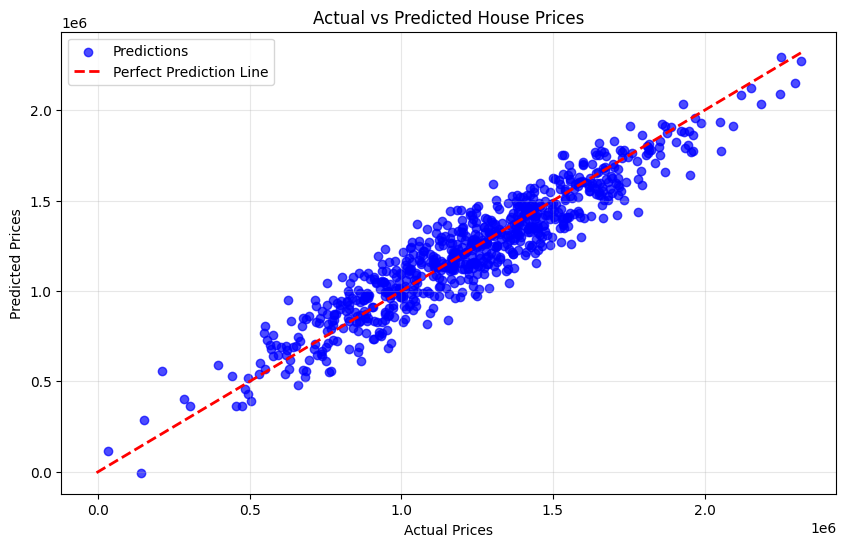


How to read this graph:
• Blue dots = Your model's predictions
• Red dashed line = Perfect predictions
• Closer the dots to the red line = Better the model


In [7]:
# Simple and efficient visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))

# Plot actual values as blue dots
plt.scatter(y_test, predictions, alpha=0.7, color='blue', label='Predictions')

# Add the perfect prediction line (diagonal line)
# This line shows where points would be if predictions were perfect
min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nHow to read this graph:")
print("• Blue dots = Your model's predictions")
print("• Red dashed line = Perfect predictions")
print("• Closer the dots to the red line = Better the model")

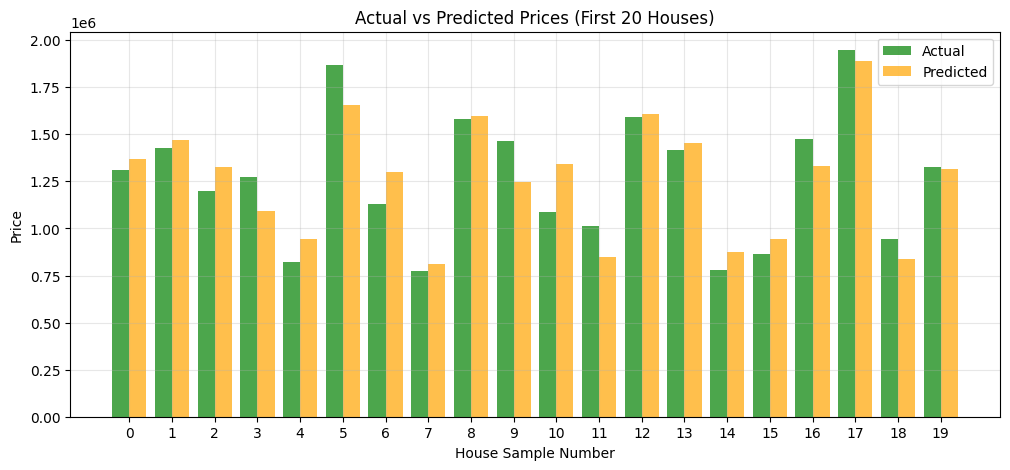


How to read this graph:
• Green bars = Actual house prices
• Orange bars = Model's predicted prices
• Similar heights = Good predictions


In [8]:
# Alternative view: Side-by-side comparison
plt.figure(figsize=(12, 5))

# Create comparison of first 20 predictions
n_samples = 20
sample_actual = y_test.iloc[:n_samples]
sample_predicted = predictions[:n_samples]
x_pos = range(n_samples)

plt.bar([x - 0.2 for x in x_pos], sample_actual, width=0.4, label='Actual', alpha=0.7, color='green')
plt.bar([x + 0.2 for x in x_pos], sample_predicted, width=0.4, label='Predicted', alpha=0.7, color='orange')

plt.xlabel('House Sample Number')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (First 20 Houses)')
plt.legend()
plt.xticks(x_pos)
plt.grid(True, alpha=0.3)
plt.show()

print("\nHow to read this graph:")
print("• Green bars = Actual house prices")
print("• Orange bars = Model's predicted prices")
print("• Similar heights = Good predictions")

In [9]:
# Train a Random Forest model for comparison
from sklearn.ensemble import RandomForestRegressor

# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=101)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Compare both models
print("Linear Regression R² Score:", metrics.r2_score(y_test, predictions))
print("Random Forest R² Score:", metrics.r2_score(y_test, rf_predictions))

Linear Regression R² Score: 0.8806545220440855
Random Forest R² Score: 0.8211387710546183


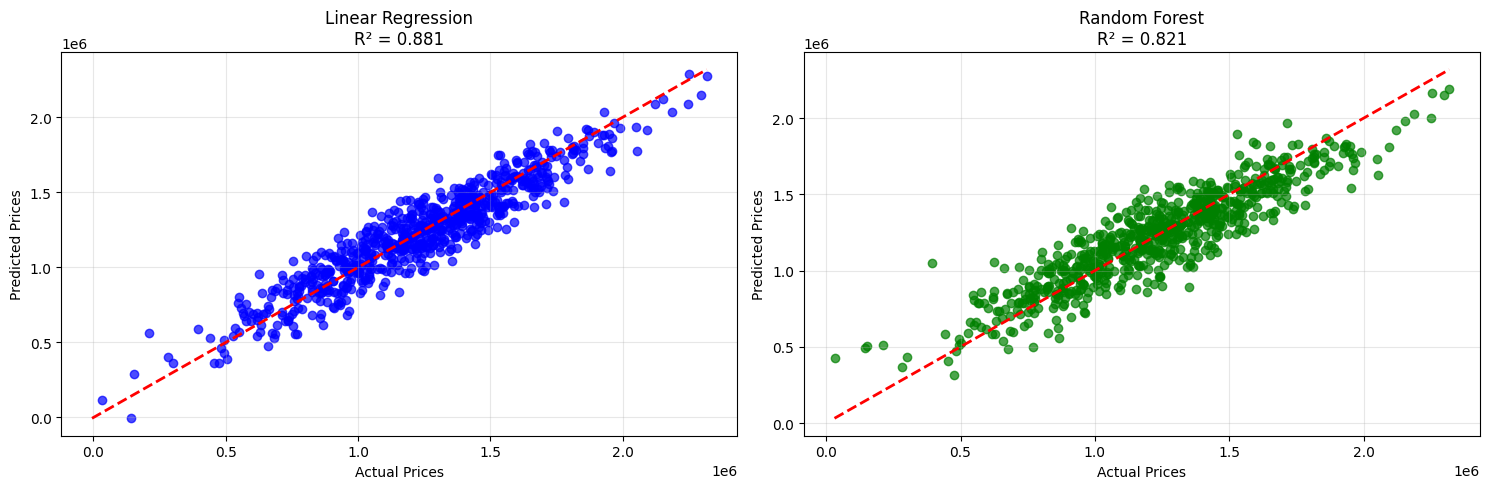


The red dashed line shows perfect predictions.
Points closer to this line indicate better model performance.


In [10]:
# Compare both models visually
plt.figure(figsize=(15, 5))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.7, color='blue')
min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Linear Regression\nR² = {metrics.r2_score(y_test, predictions):.3f}')
plt.grid(True, alpha=0.3)

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.7, color='green')
min_val = min(min(y_test), min(rf_predictions))
max_val = max(max(y_test), max(rf_predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Random Forest\nR² = {metrics.r2_score(y_test, rf_predictions):.3f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nThe red dashed line shows perfect predictions.")
print("Points closer to this line indicate better model performance.")